# Demo Classification with Iris dataset

In [92]:
from sklearn import datasets

# from sklearn.feature_selection import SelectKBest, f_regression 
# from sklearn.linear_model import LinearRegression 
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(3456)

In [26]:
from sklearn import datasets
iris = datasets.load_iris()

In [27]:
print (iris.DESCR)
print (iris.data)
print (iris.data.shape)
print (iris.feature_names)
print (iris.target)
print (iris.target.shape)
print (iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
## Create a data frame from the dictionary
feature_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
species = [iris.target_names[x] for x in iris.target]
df = pd.DataFrame(iris['data'], 
                  columns = feature_cols)
df['Target'] = iris.target
df['Species'] = species

print(df.dtypes)
df.head()

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Target            int64
Species          object
dtype: object


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


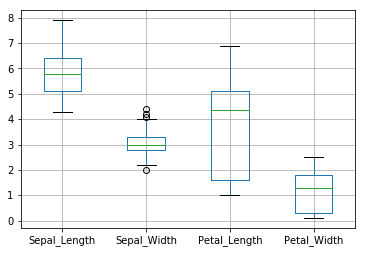

In [108]:
print(df[feature_cols].describe())
boxes = df[feature_cols].boxplot(return_type='axes')

### Exploratory Data Analysis

#### Number of unique categories and number of cases for each category

In [47]:
df[['Species']].groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

#### Plot scatter plots

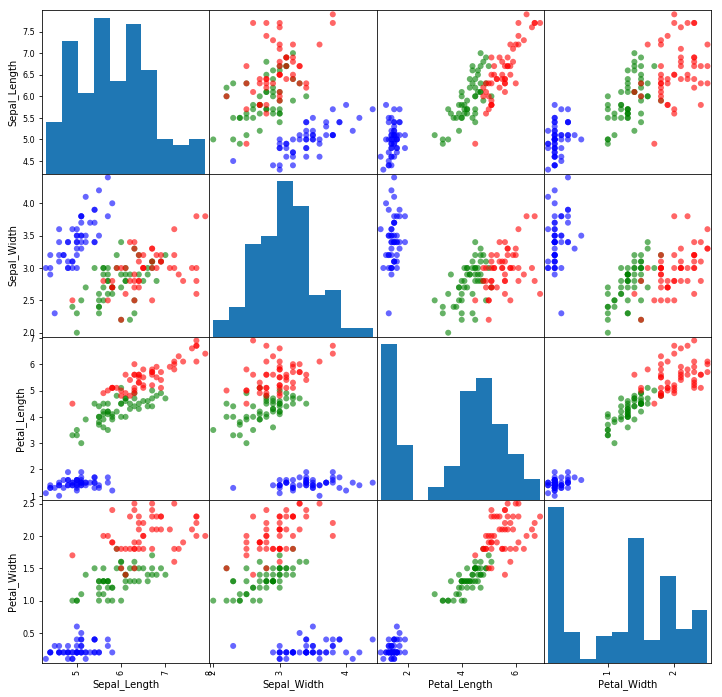

In [70]:
color_mapping = dict(zip(iris.target_names, ('blue','green','red')))
colors = df['Species'].map(color_mapping)

sc = pd.plotting.scatter_matrix(df[feature_cols], 
                                alpha=0.6, 
                                figsize=(12, 12), 
                                diagonal='hist', 
                                color=colors, 
                                marker='o', 
                                grid=True,
                               )

### Prepare the data set

#### Scale the data
The mean of each column is zero and the standard deviation is approximately 1.0.

In [53]:
from sklearn.preprocessing import scale

np_scaled = scale(df[feature_cols])

df_scaled = pd.DataFrame(np_scaled, columns = feature_cols)
df_scaled['Target'] = df['Target']
print(df_scaled.describe().round(3))

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width   Target
count       150.000      150.000       150.000      150.000  150.000
mean         -0.000       -0.000        -0.000       -0.000    1.000
std           1.003        1.003         1.003        1.003    0.819
min          -1.870       -2.434        -1.568       -1.447    0.000
25%          -0.901       -0.592        -1.227       -1.184    0.000
50%          -0.053       -0.132         0.336        0.133    1.000
75%           0.675        0.559         0.763        0.791    2.000
max           2.492        3.091         1.786        1.712    2.000


### Splitting the dataset into a test and evaluation sub-sets

In [122]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(np.asmatrix(df_scaled), test_size = 0.5)

df_train_features = df_train[:, :4]
df_train_labels = np.ravel(df_train[:, 4])

df_test_features = df_test[:, :4]
df_test_labels = np.ravel(df_test[:, 4])

print(df_train_features.shape)
print(df_train_labels.shape)
print(df_test_features.shape)
print(df_test_labels.shape)

(75, 4)
(75,)
(75, 4)
(75,)


### Train and evaluate the KNN model

In [102]:
from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(df_train_features, df_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [103]:
df_test = pd.DataFrame(df_test_features, columns = feature_cols)
df_test['predicted'] = KNN_mod.predict(df_test_features)

df_test['correct'] = [1 if x == z else 0 for x, z in zip(df_test['predicted'], df_test_labels)]
accuracy = 100.0 * float(sum(df_test['correct'])) / float(df_test.shape[0])
print(accuracy)

96.0


'Done'

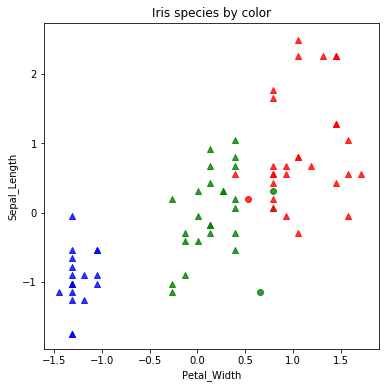

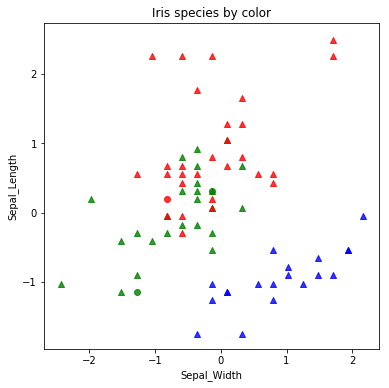

In [104]:
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
df_test['Species'] = [levels[x] for x in df_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}

def plot_shapes(df, col1, col2, markers, colors):
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictioary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m) & (df['Species'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species by color')
    return 'Done'

plot_shapes(df_test, 'Petal_Width', 'Sepal_Length', markers, colors)
plot_shapes(df_test, 'Sepal_Width', 'Sepal_Length', markers, colors)

In the plots above color is used to show the predicted class. 

Correctly classified cases are shown by triangles and incorrectly classified cases are shown by circles.

### Support Vector Machine - SVM

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear', random_state=101, gamma='auto')

svclassifier.fit(df_train_features, df_train_labels)  

scores = cross_val_score(svclassifier, 
                         df_train_features, 
                         df_train_labels, 
                         cv=5, 
                         scoring='accuracy')

print ("SVC with rbf kernel -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

SVC with rbf kernel -> cross validation accuracy: mean = 0.959 std = 0.033


In [117]:
df_test = pd.DataFrame(df_test_features, columns = feature_cols)
df_test['predicted'] = svclassifier.predict(df_test_features)

df_test['correct'] = [1 if x == z else 0 for x, z in zip(df_test['predicted'], df_test_labels)]
accuracy = 100.0 * float(sum(df_test['correct'])) / float(df_test.shape[0])
print(accuracy)

97.33333333333333


In [116]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(df_test['correct'], df_test['predicted']))  
print(classification_report(df_test['correct'], df_test['predicted']))  

[[ 0  1  1]
 [19 25 29]
 [ 0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.96      0.34      0.51        73
         2.0       0.00      0.00      0.00         0

   micro avg       0.33      0.33      0.33        75
   macro avg       0.32      0.11      0.17        75
weighted avg       0.94      0.33      0.49        75



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
